<a href="https://colab.research.google.com/github/natoo77/SocialMediaSentiment/blob/main/Social_media_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [71]:
import kagglehub
import os

# Download latest data version from kaggle
path = kagglehub.dataset_download("kashishparmar02/social-media-sentiments-analysis-dataset")
print("Path to dataset files:", path)

file_path = os.path.join(path, 'sentimentdataset.csv')

data = pd.read_csv(file_path)


Path to dataset files: /root/.cache/kagglehub/datasets/kashishparmar02/social-media-sentiments-analysis-dataset/versions/3


In [72]:
# @title Data exploration

In [73]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [75]:
data = data.iloc[:,2:]
data.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


`Feature	Description`

*   `Text`	User-generated content showcasing sentiments
*  `Sentiment`	Categorized emotions
*   `Timestamp`	Date and time information
*   `User`	Unique identifiers of users contributing
*   `Platform`	Social media platform where the content originated
*   `Hashtags`	Identifies trending topics and themes
*   `Likes`	Quantifies user engagement (likes)
*  `Retweets`	Reflects content popularity (retweets)
*   `Country`	Geographical origin of each post
*  `Year`	Year of the post
*   `Month`	Month of the post
*   `Day`	Day of the post
*  `Hour`	Hour of the post


In [76]:
# @title Data preprocessing - 'Sentiment' column grouping

Let's explore how many unique velues we have in 'Sentiment' column

In [77]:
print(f"Number of unique values of Sentiment column: {data['Sentiment'].nunique()}\n")

print(data['Sentiment'].unique())

Number of unique values of Sentiment column: 279

[' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety    

<Axes: ylabel='count'>

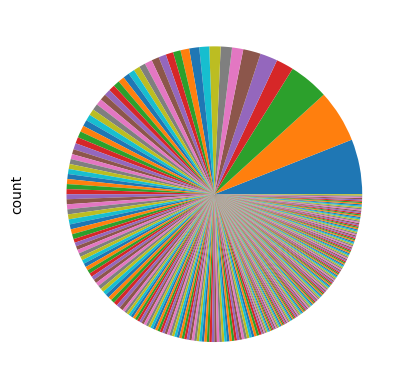

In [78]:
#Rozkład zmiennej sentyment
data['Sentiment'].value_counts().plot(kind='pie', labels=None)

We have 279 values of sentiment - let's try to group it into only 3 categories - Positive, Neutral and Negative

In [79]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon') #Compute sentiment labels


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [80]:
#Getting unique values
sentiment_unique = data['Sentiment'].unique()
#For every unique value calculate polarity score
sentiment_values = []
for item in sentiment_unique:
  sentiment_value = SentimentIntensityAnalyzer().polarity_scores(item)
  sentiment_values.append(sentiment_value)


The *SentimentIntensityAnalyzer* produces a dictionary with four key metrics:

**neg**: Proportion of the text classified as negative.

**neu**: Proportion of the text classified as neutral.

**pos**: Proportion of the text classified as positive.

**compound**: A normalized score between -1 (most negative) and +1 (most positive). This is the overall sentiment score.

In [81]:
#CHecking the scoes for all unique sentiment values
for i in range(len(sentiment_unique)):
    print(f"{sentiment_unique[i].strip()} -> {sentiment_values[i]}")

Positive -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
Negative -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}
Neutral -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Anger -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}
Fear -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4939}
Sadness -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4404}
Disgust -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5994}
Happiness -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
Joy -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}
Love -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
Amusement -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3612}
Enjoyment -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
Admiration -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5423}
Affection -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5267}
Awe -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

We can see that on the words like FestiveJoy
InnerJourney, the analysis doesnt work well so let's devide these words.



In [82]:
import re

def split_compound_words(text):
    # Insert space before each uppercase letter (except the first letter)
    separated_text = re.sub(r'(?<!^)(?=[A-Z])', ' ', text)
    return separated_text.lower()

# Apply the function to the Sentiment column
data['Processed_Sentiment'] = data['Sentiment'].apply(split_compound_words)



In [83]:
sentiment_unique_prc = data['Processed_Sentiment'].unique()
sentiment_values_prc = []
for item in sentiment_unique_prc:
  sentiment_value_prc = SentimentIntensityAnalyzer().polarity_scores(item)
  sentiment_values_prc.append(sentiment_value_prc)

for i in range(len(sentiment_unique_prc)):
    print(f"{sentiment_unique_prc[i].strip()} -> {sentiment_values_prc[i]}")

positive -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
negative -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}
neutral -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
anger -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}
fear -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4939}
sadness -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4404}
disgust -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5994}
happiness -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
joy -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}
love -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
amusement -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3612}
enjoyment -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
admiration -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5423}
affection -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5267}
awe -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

We can compare now after text cleaning some of the compund words:

**PlayfulJoy** -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

**playful joy** -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.7717}

**LostLove** -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

**lost love** -> {'neg': 0.354, 'neu': 0.0, 'pos': 0.646, 'compound': 0.4404}




In [84]:
# Define the sentiment grouping function
def sentiment_grouping(score):
    if score >= 0.1:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Initialize an empty dictionary to store grouped words
grouped_words = {'Positive': [], 'Negative': [], 'Neutral': []}

# Iterate over the data and group words
for i in range(len(sentiment_unique_prc)):
    word = sentiment_unique_prc[i].strip()  # Get the word
    score = sentiment_values_prc[i]['compound']  # Get the sentiment score
    category = sentiment_grouping(score)  # Get the sentiment category
    grouped_words[category].append(word)  # Add the word to the appropriate group

# Print the grouped words
print(grouped_words['Positive'])
print(grouped_words['Negative'])
print(grouped_words['Neutral'])

['positive', 'happiness', 'joy', 'love', 'amusement', 'enjoyment', 'admiration', 'affection', 'surprise', 'acceptance', 'adoration', 'anticipation', 'calmness', 'excitement', 'kind', 'pride', 'excitement', 'elation', 'euphoria', 'contentment', 'gratitude', 'hope', 'compassion', 'tenderness', 'enthusiasm', 'compassion', 'elation', 'acceptance', 'determination', 'contentment', 'hopeful', 'proud', 'grateful', 'empathetic', 'compassionate', 'playful', 'inspired', 'confident', 'yearning', 'determination', 'thrill', 'calmness', 'gratitude', 'admiration', 'overjoyed', 'inspiration', 'motivation', 'amusement', 'joyful reunion', 'excitement', 'satisfaction', 'blessed', 'anticipation', 'appreciation', 'confidence', 'surprise', 'optimism', 'pride', 'happiness', 'playful joy', 'dream chaser', 'elegance', 'thrill', 'harmony', 'creativity', 'radiance', 'inspiration', 'coziness', 'gratitude', 'adventure', 'euphoria', 'festive joy', 'freedom', 'harmony', 'radiance', 'inspiration', 'euphoria', 'spark',

In [85]:
# Define a function to find the category of a word
def find_category(word):
    for category, words in grouped_words.items():
        if word in words:  # Check if the word is in the list
            return category
    return 'Unknown'  # Default if the word is not in any category

# Apply the function to the DataFrame
data['Sentiment_category'] = data['Processed_Sentiment'].str.strip().apply(find_category)

# Print the resulting DataFrame
data.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Processed_Sentiment,Sentiment_category
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive,Positive
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,negative,Negative
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive,Positive
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral,Neutral


<Axes: ylabel='count'>

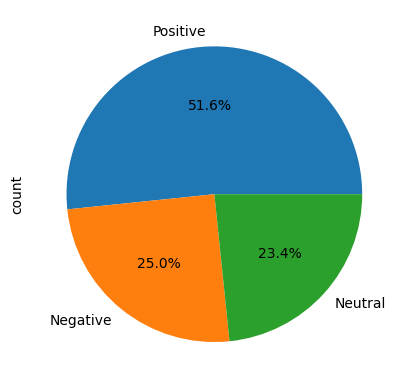

In [86]:
#Sentiment category after grouping
data['Sentiment_category'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [87]:
# @title Data preprocessing - 'Text' column cleaning

In [88]:
import string, re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt_tab')  # For word_tokenize
nltk.download('stopwords')  # For stop words
stop_words = set(stopwords.words('english'))  # Load stop words

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
max(data["Text"].str.len())

157

In [90]:
text_list = data["Text"].to_list()
text_list[:10]

[' Enjoying a beautiful day at the park!              ',
 ' Traffic was terrible this morning.                 ',
 ' Just finished an amazing workout! 💪               ',
 ' Excited about the upcoming weekend getaway!        ',
 ' Trying out a new recipe for dinner tonight.        ',
 ' Feeling grateful for the little things in life.    ',
 ' Rainy days call for cozy blankets and hot cocoa.   ',
 ' The new movie release is a must-watch!             ',
 ' Political discussions heating up on the timeline.  ',
 ' Missing summer vibes and beach days.               ']

In [91]:
def clean_text(text):
    #Convert Text to Lowercase
    text = str(text).lower()
    # Remove dots and comas
    text = re.sub("[,\.\!\:]", '', text)
    # Remove Extra Spaces
    text = " ".join(text.split())
    #Tokenize the Text
    tokens = word_tokenize(text)

    cleaned_tokens = [token for token in tokens if token.lower() not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

data["Clean_Text"] = data["Text"].apply(clean_text)

In [92]:
clean_text_list = data["Clean_Text"].to_list()
clean_text_list[:10]

['enjoying beautiful day park',
 'traffic terrible morning',
 'finished amazing workout 💪',
 'excited upcoming weekend getaway',
 'trying new recipe dinner tonight',
 'feeling grateful little things life',
 'rainy days call cozy blankets hot cocoa',
 'new movie release must-watch',
 'political discussions heating timeline',
 'missing summer vibes beach days']

In [93]:
# Display a sample of the cleaned data
data[['Text', 'Clean_Text']].head()

,Text,Clean_Text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout 💪
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


In [94]:
data['Correctly_Tokenized_Text'] = data['Clean_Text'].apply(word_tokenize)
data[['Text', 'Correctly_Tokenized_Text']].head()

,Text,Correctly_Tokenized_Text
0,Enjoying a beautiful day at the park! ...,"[enjoying, beautiful, day, park]"
1,Traffic was terrible this morning. ...,"[traffic, terrible, morning]"
2,Just finished an amazing workout! 💪 ...,"[finished, amazing, workout, 💪]"
3,Excited about the upcoming weekend getaway! ...,"[excited, upcoming, weekend, getaway]"
4,Trying out a new recipe for dinner tonight. ...,"[trying, new, recipe, dinner, tonight]"


In [95]:
# @title Approach 1: Vader Sentiment analysis

In [96]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [97]:
text_sentiment_values =[]

for item in data['Clean_Text']:
  text_sentiment_value = SentimentIntensityAnalyzer().polarity_scores(item)
  text_sentiment_values.append(text_sentiment_value)

In [98]:
for i in range(len(text_sentiment_values)):
    print(f"{data['Clean_Text'][i].strip()} -> {text_sentiment_values[i]}")

enjoying beautiful day park -> {'neg': 0.0, 'neu': 0.215, 'pos': 0.785, 'compound': 0.8074}
traffic terrible morning -> {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}
finished amazing workout 💪 -> {'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.5859}
excited upcoming weekend getaway -> {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.34}
trying new recipe dinner tonight -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
feeling grateful little things life -> {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.5423}
rainy days call cozy blankets hot cocoa -> {'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'compound': -0.0772}
new movie release must-watch -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
political discussions heating timeline -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
missing summer vibes beach days -> {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}
published new blog post check -> {'neg': 0.0, 'neu': 1.0, 'pos'

In [99]:
# # Initialize an empty dictionary to store grouped words
grouped_text = {'Positive': [], 'Negative': [], 'Neutral': []}
y_pred_category = []

# Iterate over the data and group words
for i in range(len(data['Clean_Text'])):
    text = data['Clean_Text'][i]  # Get the text
    score = text_sentiment_values[i]['compound']  # Get the sentiment score
    category = sentiment_grouping(score)  # Get the sentiment category
    y_pred_category.append(category)
    grouped_text[category].append(text)  # Add the word to the appropriate group

# Print the grouped words
print(grouped_text['Positive'])
print(grouped_text['Negative'])
print(grouped_text['Neutral'])

['enjoying beautiful day park', 'finished amazing workout 💪', 'excited upcoming weekend getaway', 'feeling grateful little things life', 'feeling bit weather today', 'new year new fitness goals 💪', 'adopted cute furry friend 🐾', 'late-night gaming session friends', 'sipping coffee enjoying good book', 'finished challenging workout routine', 'celebrating milestone work 🎉', 'sunday brunch friends', 'learning new language personal growth', 'quiet evening good book', 'reflecting importance mental health', 'new painting progress 🎨', 'enjoying cup tea watching sunset', 'coding new project enthusiasm', 'feeling inspired attending workshop', 'excited upcoming gaming tournament', "celebrating friend 's birthday tonight 🎂", 'feeling accomplished productive day', 'cozy evening good movie', 'new book release favorite author', 'reflecting beauty nature', 'cooking special dinner loved ones', 'feeling optimistic week ahead', 'starting new fitness challenge tomorrow 💪', "ca n't believe injustice happe

In [100]:
y_pred_category
y_category = data['Sentiment_category'].tolist()

len(y_pred_category), len(y_category)

(732, 732)

In [101]:

#Classification report for bag of words
vader_report=classification_report(y_category,y_pred_category)
print(vader_report)

              precision    recall  f1-score   support

    Negative       0.82      0.84      0.83       183
     Neutral       0.46      0.24      0.32       171
    Positive       0.73      0.88      0.80       378

    accuracy                           0.72       732
   macro avg       0.67      0.65      0.65       732
weighted avg       0.69      0.72      0.69       732



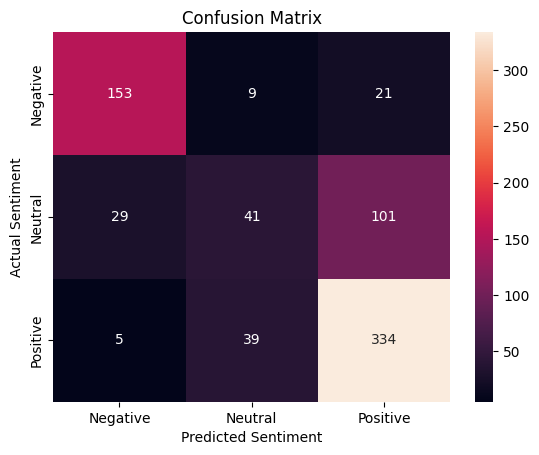

In [102]:
conf_matrix = confusion_matrix(y_category,y_pred_category)
sns.heatmap(conf_matrix, annot=True, xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"],fmt="d", cmap="rocket")
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()

In [103]:
# @title Approach 2: Supervised Learning: Different Models testing

In [105]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression,SGDClassifier, PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split

In [107]:
# Dividing into X and y
X = np.stack(data['Clean_Text'])
y = data['Sentiment_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [108]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0.0, max_df=1,binary=False,ngram_range=(1,2))

#transformed train reviews
cv_text_train=cv.fit_transform(X_train)

#transformed test reviews
cv_text_test=cv.transform(X_test)

print('BOW_cv_train:',cv_text_train.shape)
print('BOW_cv_test:',cv_text_test.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (512, 4277)
BOW_cv_test: (220, 4277)


In [109]:
bow_df = pd.DataFrame(cv_text_train.toarray(), columns=cv.get_feature_names_out())

# Display the Bag-of-Words DataFrame
bow_df

,ablaze,ablaze forging,abyss despair,academic frustration,academic juggling,acceptance dance,acceptance journey,accepts,accepts award,accidentally liked,...,yet,yet unexplored,york,york city,zen,zen wisdom,zero,zero lazyday,zestful,zestful heart
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0.0,max_df=1,use_idf=True,ngram_range=(1,2))

#transformed train reviews
tv_text_train=tv.fit_transform(X_train)

#transformed test reviews
tv_text_test=tv.transform(X_test)
print('Tfidf_train:',tv_text_train.shape)
print('Tfidf_test:',tv_text_test.shape)

Tfidf_train: (512, 4277)
Tfidf_test: (220, 4277)


In [111]:
tfidf_df = pd.DataFrame(tv_text_train.toarray(), columns=tv.get_feature_names_out())

# Display the Bag-of-Words DataFrame
tfidf_df.head()

,ablaze,ablaze forging,abyss despair,academic frustration,academic juggling,acceptance dance,acceptance journey,accepts,accepts award,accidentally liked,...,yet,yet unexplored,york,york city,zen,zen wisdom,zero,zero lazyday,zestful,zestful heart
0,0.0,0.0,0.0,0.0,0.0,0.0,0.447214,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let us build logistic regression model for both bag of words and tfidf


In [124]:
#Building Model
lr=LogisticRegression()

#Fitting the model for Bag of words
lr_bow=lr.fit(cv_text_train,y_train)

#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_text_train,y_train)

In [125]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_text_test)

##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_text_test)

In [126]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.5636363636363636
lr_tfidf_score : 0.5181818181818182


In [127]:
#Classification report for bag of words
lr_bow_report=classification_report(y_test,lr_bow_predict)
print("Logistic Regression with BoW\n")
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(y_test,lr_tfidf_predict)
print("Logistic Regression with TFIDF\n")
print(lr_tfidf_report)

Logistic Regression with BoW

              precision    recall  f1-score   support

    Negative       0.82      0.15      0.26        59
     Neutral       0.75      0.12      0.21        50
    Positive       0.54      0.98      0.70       111

    accuracy                           0.56       220
   macro avg       0.70      0.42      0.39       220
weighted avg       0.66      0.56      0.47       220

Logistic Regression with TFIDF

              precision    recall  f1-score   support

    Negative       1.00      0.02      0.03        59
     Neutral       1.00      0.04      0.08        50
    Positive       0.51      1.00      0.68       111

    accuracy                           0.52       220
   macro avg       0.84      0.35      0.26       220
weighted avg       0.75      0.52      0.37       220



We can see that for such a simple and small  social media comments dataset
bag of words is performing better than TFDIF and it's completely sufficient cause we don't nee to focus ondistinguishing between common and rare words, where tfdif would be more appropiate.

In [123]:
# Stochastic gradient descent or Linear support vector machines for bag of words

#training the linear svm
svm=SGDClassifier()

#fitting the svm for bag of words
svm_bow=svm.fit(cv_text_train,y_train)

#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_text_test)

#Accuracy score for bag of words
svm_bow_score=accuracy_score(y_test,svm_bow_predict)

#Classification report for bag of words
svm_bow_report=classification_report(y_test,svm_bow_predict)
print(svm_bow_report)


              precision    recall  f1-score   support

    Negative       0.68      0.66      0.67        59
     Neutral       0.56      0.44      0.49        50
    Positive       0.69      0.77      0.72       111

    accuracy                           0.66       220
   macro avg       0.64      0.62      0.63       220
weighted avg       0.66      0.66      0.66       220



In [129]:
# PassiveAggressiveClassifier model for BoW

#training the model
pac = PassiveAggressiveClassifier()

#fitting the svm for bag of words
pac_bow=pac.fit(cv_text_train, y_train)

#Predicting the model for bag of words
pac_bow_predict=pac.predict(cv_text_test)

#Accuracy score for bag of words
pac_bow_score=accuracy_score(y_test,pac_bow_predict)

#Classification report for bag of words
pac_bow_report=classification_report(y_test,pac_bow_predict)
print(pac_bow_report)


              precision    recall  f1-score   support

    Negative       0.80      0.41      0.54        59
     Neutral       0.59      0.26      0.36        50
    Positive       0.61      0.92      0.73       111

    accuracy                           0.63       220
   macro avg       0.67      0.53      0.54       220
weighted avg       0.66      0.63      0.60       220



In [56]:
# @title Approach 3: Deep Learning with PyTorch and built-in BERT model

In [27]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import BertTokenizer
import torch.nn as nn
from transformers import BertModel

BERT's tokenizeris designed to handle raw text effectively. It performs tokenization by: splitting text into words, subwords, or characters.
Handling special characters (e.g., emojis, punctuation). Therefore we will feed it the original "Text" column here.

In [137]:
data_sentiment=data[['Text','Sentiment_category']]
data_sentiment.head(10)

,Text,Sentiment_category
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral
5,Feeling grateful for the little things in lif...,Positive
6,Rainy days call for cozy blankets and hot coc...,Positive
7,The new movie release is a must-watch! ...,Positive
8,Political discussions heating up on the timel...,Negative
9,Missing summer vibes and beach days. ...,Neutral


In [138]:
# Step 1: Map sentiment categories to numeric labels
label_mapping = {"Positive": 1, "Negative": 0, "Neutral": 2}
data_sentiment['Sentiment_label'] = data_sentiment['Sentiment_category'].map(label_mapping)

# Step 2: Custom Dataset for PyTorch
class SentimentDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=128):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Extract text and label
        text = self.data.iloc[idx]['Text']
        label = self.data.iloc[idx]['Sentiment_label']

        # Tokenize text
        encoded = self.tokenizer(
            text,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )

        return {
            "input_ids": encoded["input_ids"].squeeze(0),  # Remove batch dimension
            "attention_mask": encoded["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long)
        }

# Step 3: Initialize Tokenizer (e.g., BERT)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Step 4: Train-Test Split
train_data, test_data = train_test_split(data_sentiment, test_size=0.2, random_state=42)

# Step 5: Create PyTorch Datasets
train_dataset = SentimentDataset(train_data, tokenizer)
test_dataset = SentimentDataset(test_data, tokenizer)

# Step 6: DataLoaders
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

# Example: Inspect one batch
for batch in train_loader:
    print(batch)
    break

<ipython-input-138-401578e27761>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment['Sentiment_label'] = data_sentiment['Sentiment_category'].map(label_mapping)


{'input_ids': tensor([[  101,  3449,  3370,  2044,  1037,  4474, 10301,  2007,  2214,  2814,
          1012,   102,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

In [140]:
# Define Sentiment Classifier
class SentimentClassifier(nn.Module):
    def __init__(self, num_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output  # [CLS] token representation
        return self.classifier(pooled_output)

# Initialize model, optimizer, and loss function
model = SentimentClassifier(num_classes=3)  # Positive, Negative, Neutral

In [ ]:
from tqdm import tqdm

optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()
model.train()  # Enable training mode
num_epochs=3

for epoch in range(num_epochs):  # Train for 3 epochs
    model.train()  # Enable training mode
    total_loss = 0  # To track total loss for this epoch

    # Using tqdm to show a progress bar
    for step, batch in tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}"):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["label"]

        optimizer.zero_grad()  # Reset gradients
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update the model parameters

        total_loss += loss.item()

        # Optionally print the loss every 10 steps
        if step % 10 == 0:
            print(f"Step {step}/{len(train_loader)}: Loss = {loss.item():.4f}")

    # Print total loss for the epoch
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1} completed. Average Loss: {avg_loss:.4f}")



Epoch 1/3:   0%|          | 1/293 [00:03<15:58,  3.28s/it]

Step 0/293: Loss = 1.2929


Epoch 1/3:   4%|▍         | 11/293 [00:32<13:28,  2.87s/it]

Step 10/293: Loss = 1.0527


Epoch 1/3:   7%|▋         | 21/293 [01:02<12:56,  2.86s/it]

Step 20/293: Loss = 0.8709


Epoch 1/3:  11%|█         | 31/293 [01:32<13:13,  3.03s/it]

Step 30/293: Loss = 0.7988


Epoch 1/3:  14%|█▍        | 41/293 [02:01<12:34,  2.99s/it]

Step 40/293: Loss = 0.9240


Epoch 1/3:  17%|█▋        | 51/293 [02:31<11:40,  2.90s/it]

Step 50/293: Loss = 0.7853


Epoch 1/3:  21%|██        | 61/293 [03:00<10:56,  2.83s/it]

Step 60/293: Loss = 1.3436


Epoch 1/3:  24%|██▍       | 71/293 [03:31<11:42,  3.17s/it]

Step 70/293: Loss = 0.5395


Epoch 1/3:  28%|██▊       | 81/293 [04:00<10:41,  3.03s/it]

Step 80/293: Loss = 0.3407


Epoch 1/3:  31%|███       | 91/293 [04:30<09:49,  2.92s/it]

Step 90/293: Loss = 0.9401


Epoch 1/3:  34%|███▍      | 101/293 [04:59<09:08,  2.86s/it]

Step 100/293: Loss = 0.3107


Epoch 1/3:  38%|███▊      | 111/293 [05:29<08:57,  2.95s/it]

Step 110/293: Loss = 0.2013


Epoch 1/3:  41%|████▏     | 121/293 [05:59<08:54,  3.11s/it]

Step 120/293: Loss = 0.6188


Epoch 1/3:  45%|████▍     | 131/293 [06:29<07:59,  2.96s/it]

Step 130/293: Loss = 0.5493


Epoch 1/3:  48%|████▊     | 141/293 [06:59<07:16,  2.87s/it]

Step 140/293: Loss = 1.0350


Epoch 1/3:  52%|█████▏    | 151/293 [07:29<06:53,  2.91s/it]

Step 150/293: Loss = 0.1727


Epoch 1/3:  55%|█████▍    | 161/293 [07:59<06:33,  2.98s/it]

Step 160/293: Loss = 0.4248


Epoch 1/3:  58%|█████▊    | 171/293 [08:28<05:55,  2.91s/it]

Step 170/293: Loss = 0.2584


Epoch 1/3:  62%|██████▏   | 181/293 [08:57<05:18,  2.85s/it]

Step 180/293: Loss = 0.1598


Epoch 1/3:  65%|██████▌   | 191/293 [09:27<05:15,  3.09s/it]

Step 190/293: Loss = 0.1292


Epoch 1/3:  69%|██████▊   | 201/293 [09:56<04:36,  3.00s/it]

Step 200/293: Loss = 0.1653


Epoch 1/3:  72%|███████▏  | 211/293 [10:25<03:58,  2.91s/it]

Step 210/293: Loss = 0.5107


Epoch 1/3:  75%|███████▌  | 221/293 [10:54<03:24,  2.84s/it]

Step 220/293: Loss = 1.1632


Epoch 1/3:  79%|███████▉  | 231/293 [11:24<03:14,  3.14s/it]

Step 230/293: Loss = 0.2879


Epoch 1/3:  82%|████████▏ | 241/293 [11:54<02:36,  3.01s/it]

Step 240/293: Loss = 1.0565


Epoch 1/3:  86%|████████▌ | 251/293 [12:23<02:02,  2.91s/it]

Step 250/293: Loss = 0.4165


Epoch 1/3:  89%|████████▉ | 261/293 [12:52<01:30,  2.84s/it]

Step 260/293: Loss = 0.3590


Epoch 1/3:  92%|█████████▏| 271/293 [13:22<01:08,  3.12s/it]

Step 270/293: Loss = 1.3752


Epoch 1/3:  96%|█████████▌| 281/293 [13:51<00:36,  3.02s/it]

Step 280/293: Loss = 0.6230


Epoch 1/3:  99%|█████████▉| 291/293 [14:21<00:05,  2.91s/it]

Step 290/293: Loss = 1.1892


Epoch 1/3: 100%|██████████| 293/293 [14:25<00:00,  2.95s/it]


Epoch 1 completed. Average Loss: 0.7076


Epoch 2/3:   0%|          | 1/293 [00:03<17:31,  3.60s/it]

Step 0/293: Loss = 0.7679


Epoch 2/3:   4%|▍         | 11/293 [00:32<13:50,  2.95s/it]

Step 10/293: Loss = 0.1088


Epoch 2/3:   7%|▋         | 21/293 [01:01<13:00,  2.87s/it]

Step 20/293: Loss = 1.6931


Epoch 2/3:  11%|█         | 31/293 [01:30<12:18,  2.82s/it]

Step 30/293: Loss = 1.0113


Epoch 2/3:  14%|█▍        | 41/293 [02:00<13:11,  3.14s/it]

Step 40/293: Loss = 0.6549


Epoch 2/3:  17%|█▋        | 51/293 [02:29<12:08,  3.01s/it]

Step 50/293: Loss = 0.0691


Epoch 2/3:  21%|██        | 61/293 [02:58<11:18,  2.93s/it]

Step 60/293: Loss = 0.0593


Epoch 2/3:  24%|██▍       | 71/293 [03:27<10:31,  2.84s/it]

Step 70/293: Loss = 0.1532


Epoch 2/3:  28%|██▊       | 81/293 [03:58<11:00,  3.12s/it]

Step 80/293: Loss = 0.0371


Epoch 2/3:  31%|███       | 91/293 [04:27<09:56,  2.95s/it]

Step 90/293: Loss = 0.1100


Epoch 2/3:  34%|███▍      | 101/293 [04:56<09:13,  2.88s/it]

Step 100/293: Loss = 0.0987


Epoch 2/3:  38%|███▊      | 111/293 [05:25<08:42,  2.87s/it]

Step 110/293: Loss = 1.7934


Epoch 2/3:  41%|████▏     | 121/293 [05:55<08:43,  3.04s/it]

Step 120/293: Loss = 0.0300


Epoch 2/3:  45%|████▍     | 131/293 [06:25<07:59,  2.96s/it]

Step 130/293: Loss = 0.0275


Epoch 2/3:  48%|████▊     | 141/293 [06:54<07:12,  2.85s/it]

Step 140/293: Loss = 0.2321


Epoch 2/3:  52%|█████▏    | 151/293 [07:24<06:58,  2.94s/it]

Step 150/293: Loss = 0.0450


Epoch 2/3:  55%|█████▍    | 161/293 [07:54<06:46,  3.08s/it]

Step 160/293: Loss = 0.3548


Epoch 2/3:  58%|█████▊    | 171/293 [08:24<05:59,  2.95s/it]

Step 170/293: Loss = 0.4187


Epoch 2/3:  62%|██████▏   | 181/293 [08:54<05:24,  2.89s/it]

Step 180/293: Loss = 0.1766


Epoch 2/3:  65%|██████▌   | 191/293 [09:24<05:24,  3.18s/it]

Step 190/293: Loss = 0.1977


Epoch 2/3:  69%|██████▊   | 201/293 [09:54<04:40,  3.05s/it]

Step 200/293: Loss = 0.1072


Epoch 2/3:  72%|███████▏  | 211/293 [10:24<03:57,  2.89s/it]

Step 210/293: Loss = 0.0786


Epoch 2/3:  75%|███████▌  | 221/293 [10:55<03:46,  3.15s/it]

Step 220/293: Loss = 0.5878


Epoch 2/3:  79%|███████▉  | 231/293 [11:24<03:10,  3.07s/it]

Step 230/293: Loss = 0.5658


Epoch 2/3:  82%|████████▏ | 241/293 [11:54<02:32,  2.94s/it]

Step 240/293: Loss = 0.0496


Epoch 2/3:  86%|████████▌ | 251/293 [12:24<01:59,  2.86s/it]

Step 250/293: Loss = 0.4927


Epoch 2/3:  89%|████████▉ | 261/293 [12:55<01:39,  3.10s/it]

Step 260/293: Loss = 0.3186


Epoch 2/3:  92%|█████████▏| 271/293 [13:24<01:05,  2.97s/it]

Step 270/293: Loss = 0.1073


Epoch 2/3:  96%|█████████▌| 281/293 [13:54<00:34,  2.89s/it]

Step 280/293: Loss = 0.0600


Epoch 2/3:  99%|█████████▉| 291/293 [14:24<00:05,  2.95s/it]

Step 290/293: Loss = 0.4237


Epoch 2/3: 100%|██████████| 293/293 [14:29<00:00,  2.97s/it]


Epoch 2 completed. Average Loss: 0.3360


Epoch 3/3:   0%|          | 1/293 [00:02<12:38,  2.60s/it]

Step 0/293: Loss = 0.0238


Epoch 3/3:   4%|▍         | 11/293 [00:30<12:48,  2.72s/it]

Step 10/293: Loss = 0.0267


Epoch 3/3:   7%|▋         | 21/293 [00:58<12:12,  2.69s/it]

Step 20/293: Loss = 0.0205


Epoch 3/3:  11%|█         | 31/293 [01:27<12:40,  2.90s/it]

Step 30/293: Loss = 0.0432


Epoch 3/3:  14%|█▍        | 41/293 [01:57<12:34,  3.00s/it]

Step 40/293: Loss = 0.7694


Epoch 3/3:  17%|█▋        | 51/293 [02:26<11:49,  2.93s/it]

Step 50/293: Loss = 0.0787


Epoch 3/3:  21%|██        | 61/293 [02:56<11:06,  2.87s/it]

Step 60/293: Loss = 0.0438


Epoch 3/3:  24%|██▍       | 71/293 [03:26<11:39,  3.15s/it]

Step 70/293: Loss = 0.0200


Epoch 3/3:  28%|██▊       | 81/293 [03:56<10:40,  3.02s/it]

Step 80/293: Loss = 0.0563


Epoch 3/3:  31%|███       | 91/293 [04:25<09:47,  2.91s/it]

Step 90/293: Loss = 0.1339


Epoch 3/3:  34%|███▍      | 101/293 [04:55<09:03,  2.83s/it]

Step 100/293: Loss = 0.6643


Epoch 3/3:  38%|███▊      | 111/293 [05:25<09:40,  3.19s/it]

Step 110/293: Loss = 0.0228


Epoch 3/3:  41%|████▏     | 121/293 [05:55<08:30,  2.97s/it]

Step 120/293: Loss = 0.0091


Epoch 3/3:  45%|████▍     | 131/293 [06:24<07:48,  2.89s/it]

Step 130/293: Loss = 0.0213


Epoch 3/3:  48%|████▊     | 141/293 [06:54<07:15,  2.87s/it]

Step 140/293: Loss = 0.4197


Epoch 3/3:  52%|█████▏    | 151/293 [07:25<07:17,  3.08s/it]

Step 150/293: Loss = 0.0405


Epoch 3/3:  55%|█████▍    | 161/293 [07:54<06:30,  2.96s/it]

Step 160/293: Loss = 0.0225


Epoch 3/3:  58%|█████▊    | 171/293 [08:24<05:50,  2.88s/it]

Step 170/293: Loss = 0.0141


Epoch 3/3:  62%|██████▏   | 181/293 [08:54<05:31,  2.96s/it]

Step 180/293: Loss = 0.0519


Epoch 3/3:  65%|██████▌   | 191/293 [09:24<05:06,  3.00s/it]

Step 190/293: Loss = 1.1959


Epoch 3/3:  69%|██████▊   | 201/293 [09:53<04:29,  2.92s/it]

Step 200/293: Loss = 0.4065


Epoch 3/3:  72%|███████▏  | 211/293 [10:23<03:55,  2.87s/it]

Step 210/293: Loss = 0.0114


Epoch 3/3:  75%|███████▌  | 221/293 [10:54<03:50,  3.21s/it]

Step 220/293: Loss = 1.0860


Epoch 3/3:  79%|███████▉  | 231/293 [11:23<03:07,  3.02s/it]

Step 230/293: Loss = 0.0655


Epoch 3/3:  82%|████████▏ | 241/293 [11:53<02:28,  2.86s/it]

Step 240/293: Loss = 0.0277


Epoch 3/3:  86%|████████▌ | 251/293 [12:22<02:00,  2.86s/it]

Step 250/293: Loss = 0.0183


Epoch 3/3:  89%|████████▉ | 261/293 [12:53<01:39,  3.10s/it]

Step 260/293: Loss = 0.0076


Epoch 3/3:  92%|█████████▏| 271/293 [13:22<01:05,  2.98s/it]

Step 270/293: Loss = 0.5514


Epoch 3/3:  96%|█████████▌| 281/293 [13:52<00:34,  2.89s/it]

Step 280/293: Loss = 0.0427


Epoch 3/3:  97%|█████████▋| 283/293 [13:59<00:31,  3.13s/it]

For **batch_size=2** and lr=2e-5 and "Clean_text"


In [65]:
from tqdm import tqdm

optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()
model.train()  # Enable training mode
num_epochs=3

for epoch in range(num_epochs):  # Train for 3 epochs
    model.train()  # Enable training mode
    total_loss = 0  # To track total loss for this epoch

    # Using tqdm to show a progress bar
    for step, batch in tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}"):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["label"]

        optimizer.zero_grad()  # Reset gradients
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update the model parameters

        total_loss += loss.item()

        # Optionally print the loss every 10 steps
        if step % 10 == 0:
            print(f"Step {step}/{len(train_loader)}: Loss = {loss.item():.4f}")

    # Print total loss for the epoch
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1} completed. Average Loss: {avg_loss:.4f}")



Epoch 1/3:   0%|          | 1/293 [00:02<11:45,  2.41s/it]

Step 0/293: Loss = 0.2388


Epoch 1/3:   4%|▍         | 11/293 [00:25<10:36,  2.26s/it]

Step 10/293: Loss = 0.4064


Epoch 1/3:   7%|▋         | 21/293 [00:48<10:39,  2.35s/it]

Step 20/293: Loss = 1.2401


Epoch 1/3:  11%|█         | 31/293 [01:10<09:29,  2.17s/it]

Step 30/293: Loss = 0.2789


Epoch 1/3:  14%|█▍        | 41/293 [01:34<10:28,  2.49s/it]

Step 40/293: Loss = 0.6678


Epoch 1/3:  17%|█▋        | 51/293 [01:55<08:35,  2.13s/it]

Step 50/293: Loss = 0.7751


Epoch 1/3:  21%|██        | 61/293 [02:24<10:08,  2.62s/it]

Step 60/293: Loss = 0.5958


Epoch 1/3:  24%|██▍       | 71/293 [02:46<08:27,  2.29s/it]

Step 70/293: Loss = 0.4353


Epoch 1/3:  28%|██▊       | 81/293 [03:08<07:23,  2.09s/it]

Step 80/293: Loss = 0.1577


Epoch 1/3:  31%|███       | 91/293 [03:31<07:35,  2.25s/it]

Step 90/293: Loss = 0.2501


Epoch 1/3:  34%|███▍      | 101/293 [03:55<08:01,  2.51s/it]

Step 100/293: Loss = 0.2384


Epoch 1/3:  38%|███▊      | 111/293 [04:18<06:36,  2.18s/it]

Step 110/293: Loss = 0.2044


Epoch 1/3:  41%|████▏     | 121/293 [04:40<06:33,  2.29s/it]

Step 120/293: Loss = 0.1346


Epoch 1/3:  45%|████▍     | 131/293 [05:02<05:49,  2.16s/it]

Step 130/293: Loss = 0.1935


Epoch 1/3:  48%|████▊     | 141/293 [05:26<05:39,  2.23s/it]

Step 140/293: Loss = 0.6767


Epoch 1/3:  52%|█████▏    | 151/293 [05:49<05:38,  2.38s/it]

Step 150/293: Loss = 0.6013


Epoch 1/3:  55%|█████▍    | 161/293 [06:11<04:46,  2.17s/it]

Step 160/293: Loss = 0.6002


Epoch 1/3:  58%|█████▊    | 171/293 [06:34<04:56,  2.43s/it]

Step 170/293: Loss = 0.1299


Epoch 1/3:  62%|██████▏   | 181/293 [06:56<04:00,  2.15s/it]

Step 180/293: Loss = 0.2891


Epoch 1/3:  65%|██████▌   | 191/293 [07:19<03:58,  2.34s/it]

Step 190/293: Loss = 0.7077


Epoch 1/3:  69%|██████▊   | 201/293 [07:41<03:13,  2.11s/it]

Step 200/293: Loss = 0.6719


Epoch 1/3:  72%|███████▏  | 211/293 [08:05<03:05,  2.26s/it]

Step 210/293: Loss = 2.0453


Epoch 1/3:  75%|███████▌  | 221/293 [08:27<02:45,  2.29s/it]

Step 220/293: Loss = 0.1926


Epoch 1/3:  79%|███████▉  | 231/293 [08:49<02:16,  2.20s/it]

Step 230/293: Loss = 0.1193


Epoch 1/3:  82%|████████▏ | 241/293 [09:12<02:05,  2.41s/it]

Step 240/293: Loss = 0.2554


Epoch 1/3:  86%|████████▌ | 251/293 [09:34<01:30,  2.15s/it]

Step 250/293: Loss = 0.1353


Epoch 1/3:  89%|████████▉ | 261/293 [09:57<01:16,  2.39s/it]

Step 260/293: Loss = 0.3261


Epoch 1/3:  92%|█████████▏| 271/293 [10:19<00:45,  2.08s/it]

Step 270/293: Loss = 0.4612


Epoch 1/3:  96%|█████████▌| 281/293 [10:41<00:26,  2.23s/it]

Step 280/293: Loss = 0.0961


Epoch 1/3:  99%|█████████▉| 291/293 [11:02<00:04,  2.04s/it]

Step 290/293: Loss = 2.2246


Epoch 1/3: 100%|██████████| 293/293 [11:06<00:00,  2.28s/it]


Epoch 1 completed. Average Loss: 0.5795


Epoch 2/3:   0%|          | 1/293 [00:02<09:49,  2.02s/it]

Step 0/293: Loss = 0.3304


Epoch 2/3:   4%|▍         | 11/293 [00:23<09:36,  2.04s/it]

Step 10/293: Loss = 0.1350


Epoch 2/3:   7%|▋         | 21/293 [00:45<10:04,  2.22s/it]

Step 20/293: Loss = 0.4254


Epoch 2/3:  11%|█         | 31/293 [01:06<08:56,  2.05s/it]

Step 30/293: Loss = 0.3200


Epoch 2/3:  14%|█▍        | 41/293 [01:28<08:59,  2.14s/it]

Step 40/293: Loss = 0.0446


Epoch 2/3:  17%|█▋        | 51/293 [01:49<08:20,  2.07s/it]

Step 50/293: Loss = 0.5451


Epoch 2/3:  21%|██        | 61/293 [02:12<08:28,  2.19s/it]

Step 60/293: Loss = 0.0929


Epoch 2/3:  24%|██▍       | 71/293 [02:34<08:16,  2.24s/it]

Step 70/293: Loss = 1.1157


Epoch 2/3:  28%|██▊       | 81/293 [02:55<07:30,  2.13s/it]

Step 80/293: Loss = 0.0468


Epoch 2/3:  31%|███       | 91/293 [03:17<07:38,  2.27s/it]

Step 90/293: Loss = 0.0880


Epoch 2/3:  34%|███▍      | 101/293 [03:40<06:57,  2.17s/it]

Step 100/293: Loss = 0.0521


Epoch 2/3:  38%|███▊      | 111/293 [04:02<07:09,  2.36s/it]

Step 110/293: Loss = 0.0302


Epoch 2/3:  41%|████▏     | 121/293 [04:24<06:02,  2.11s/it]

Step 120/293: Loss = 0.0208


Epoch 2/3:  45%|████▍     | 131/293 [04:46<06:32,  2.42s/it]

Step 130/293: Loss = 0.4340


Epoch 2/3:  48%|████▊     | 141/293 [05:08<05:17,  2.09s/it]

Step 140/293: Loss = 0.2719


Epoch 2/3:  52%|█████▏    | 151/293 [05:30<05:35,  2.36s/it]

Step 150/293: Loss = 0.2507


Epoch 2/3:  55%|█████▍    | 161/293 [05:52<04:34,  2.08s/it]

Step 160/293: Loss = 0.1058


Epoch 2/3:  58%|█████▊    | 171/293 [06:14<04:33,  2.24s/it]

Step 170/293: Loss = 0.5498


Epoch 2/3:  62%|██████▏   | 181/293 [06:35<03:51,  2.07s/it]

Step 180/293: Loss = 0.3300


Epoch 2/3:  65%|██████▌   | 191/293 [06:58<03:53,  2.29s/it]

Step 190/293: Loss = 0.2839


Epoch 2/3:  69%|██████▊   | 201/293 [07:19<03:11,  2.08s/it]

Step 200/293: Loss = 0.0628


Epoch 2/3:  72%|███████▏  | 211/293 [07:41<02:59,  2.19s/it]

Step 210/293: Loss = 1.2770


Epoch 2/3:  75%|███████▌  | 221/293 [08:03<02:32,  2.11s/it]

Step 220/293: Loss = 0.0666


Epoch 2/3:  79%|███████▉  | 231/293 [08:25<02:13,  2.16s/it]

Step 230/293: Loss = 0.1647


Epoch 2/3:  82%|████████▏ | 241/293 [08:47<01:58,  2.28s/it]

Step 240/293: Loss = 0.3821


Epoch 2/3:  86%|████████▌ | 251/293 [09:09<01:30,  2.16s/it]

Step 250/293: Loss = 0.2989


Epoch 2/3:  89%|████████▉ | 261/293 [09:32<01:16,  2.40s/it]

Step 260/293: Loss = 0.1658


Epoch 2/3:  92%|█████████▏| 271/293 [09:54<00:47,  2.16s/it]

Step 270/293: Loss = 0.0422


Epoch 2/3:  96%|█████████▌| 281/293 [10:17<00:29,  2.44s/it]

Step 280/293: Loss = 1.6737


Epoch 2/3:  99%|█████████▉| 291/293 [10:38<00:04,  2.12s/it]

Step 290/293: Loss = 0.0400


Epoch 2/3: 100%|██████████| 293/293 [10:42<00:00,  2.19s/it]


Epoch 2 completed. Average Loss: 0.3559


Epoch 3/3:   0%|          | 1/293 [00:02<14:24,  2.96s/it]

Step 0/293: Loss = 0.0844


Epoch 3/3:   4%|▍         | 11/293 [00:24<10:01,  2.13s/it]

Step 10/293: Loss = 0.3645


Epoch 3/3:   7%|▋         | 21/293 [00:47<10:45,  2.37s/it]

Step 20/293: Loss = 0.1150


Epoch 3/3:  11%|█         | 31/293 [01:08<09:07,  2.09s/it]

Step 30/293: Loss = 0.0822


Epoch 3/3:  14%|█▍        | 41/293 [01:31<09:39,  2.30s/it]

Step 40/293: Loss = 0.0159


Epoch 3/3:  17%|█▋        | 51/293 [01:52<08:28,  2.10s/it]

Step 50/293: Loss = 0.0304


Epoch 3/3:  21%|██        | 61/293 [02:15<08:57,  2.31s/it]

Step 60/293: Loss = 0.0097


Epoch 3/3:  24%|██▍       | 71/293 [02:37<07:41,  2.08s/it]

Step 70/293: Loss = 0.0216


Epoch 3/3:  28%|██▊       | 81/293 [02:59<07:39,  2.17s/it]

Step 80/293: Loss = 0.0290


Epoch 3/3:  31%|███       | 91/293 [03:21<07:06,  2.11s/it]

Step 90/293: Loss = 0.0072


Epoch 3/3:  34%|███▍      | 101/293 [03:43<07:00,  2.19s/it]

Step 100/293: Loss = 0.2869


Epoch 3/3:  38%|███▊      | 111/293 [04:06<06:54,  2.28s/it]

Step 110/293: Loss = 2.2901


Epoch 3/3:  41%|████▏     | 121/293 [04:28<06:17,  2.20s/it]

Step 120/293: Loss = 0.1166


Epoch 3/3:  45%|████▍     | 131/293 [04:51<06:26,  2.39s/it]

Step 130/293: Loss = 0.0243


Epoch 3/3:  48%|████▊     | 141/293 [05:12<05:26,  2.15s/it]

Step 140/293: Loss = 0.0312


Epoch 3/3:  52%|█████▏    | 151/293 [05:36<05:46,  2.44s/it]

Step 150/293: Loss = 0.1232


Epoch 3/3:  55%|█████▍    | 161/293 [05:57<04:45,  2.16s/it]

Step 160/293: Loss = 0.0119


Epoch 3/3:  58%|█████▊    | 171/293 [06:20<04:40,  2.30s/it]

Step 170/293: Loss = 0.0358


Epoch 3/3:  62%|██████▏   | 181/293 [06:42<03:51,  2.06s/it]

Step 180/293: Loss = 0.0914


Epoch 3/3:  65%|██████▌   | 191/293 [07:04<03:45,  2.21s/it]

Step 190/293: Loss = 0.7395


Epoch 3/3:  69%|██████▊   | 201/293 [07:26<03:15,  2.12s/it]

Step 200/293: Loss = 0.1319


Epoch 3/3:  72%|███████▏  | 211/293 [07:49<03:02,  2.23s/it]

Step 210/293: Loss = 0.3675


Epoch 3/3:  75%|███████▌  | 221/293 [08:11<02:39,  2.21s/it]

Step 220/293: Loss = 0.6787


Epoch 3/3:  79%|███████▉  | 231/293 [08:33<02:12,  2.13s/it]

Step 230/293: Loss = 0.0117


Epoch 3/3:  82%|████████▏ | 241/293 [08:55<02:03,  2.37s/it]

Step 240/293: Loss = 0.0251


Epoch 3/3:  86%|████████▌ | 251/293 [09:17<01:30,  2.16s/it]

Step 250/293: Loss = 0.0155


Epoch 3/3:  89%|████████▉ | 261/293 [09:40<01:17,  2.41s/it]

Step 260/293: Loss = 0.6314


Epoch 3/3:  92%|█████████▏| 271/293 [10:02<00:46,  2.12s/it]

Step 270/293: Loss = 0.4345


Epoch 3/3:  96%|█████████▌| 281/293 [10:24<00:27,  2.28s/it]

Step 280/293: Loss = 0.0310


Epoch 3/3:  99%|█████████▉| 291/293 [10:46<00:04,  2.10s/it]

Step 290/293: Loss = 0.7808


Epoch 3/3: 100%|██████████| 293/293 [10:50<00:00,  2.22s/it]

Epoch 3 completed. Average Loss: 0.1692


In [66]:
model.eval()  # Enable evaluation mode
true_labels = []
predicted_labels = []

with torch.no_grad():  # Disable gradient computation
    for batch in test_loader:
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["label"]

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs, dim=1)

        true_labels.extend(labels.tolist())
        predicted_labels.extend(predictions.tolist())

print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.85      0.82      0.83        67
           2       0.66      0.66      0.66        38

    accuracy                           0.80       147
   macro avg       0.79      0.79      0.79       147
weighted avg       0.80      0.80      0.80       147



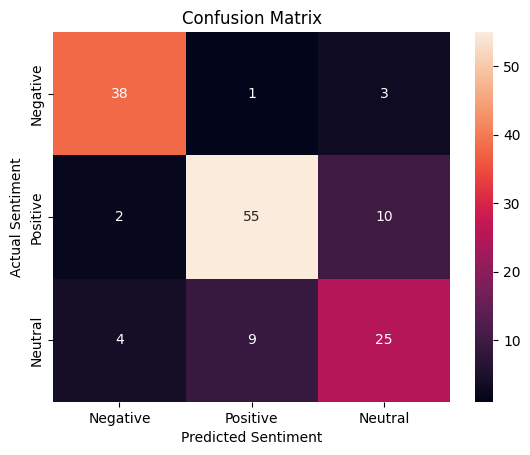

In [69]:
conf_matrix = confusion_matrix(true_labels,predicted_labels)
sns.heatmap(conf_matrix, annot=True, xticklabels=["Negative", "Positive", "Neutral"], yticklabels=["Negative", "Positive", "Neutral"],fmt="d", cmap="rocket")
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()

For **batch_size=5**

In [34]:
from tqdm import tqdm

optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()
model.train()  # Enable training mode
num_epochs=3

for epoch in range(num_epochs):  # Train for 3 epochs
    model.train()  # Enable training mode
    total_loss = 0  # To track total loss for this epoch

    # Using tqdm to show a progress bar
    for step, batch in tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}"):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["label"]

        optimizer.zero_grad()  # Reset gradients
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update the model parameters

        total_loss += loss.item()

        # Optionally print the loss every 10 steps
        if step % 10 == 0:
            print(f"Step {step}/{len(train_loader)}: Loss = {loss.item():.4f}")

    # Print total loss for the epoch
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1} completed. Average Loss: {avg_loss:.4f}")



Epoch 1/3:   1%|          | 1/117 [00:15<29:19, 15.17s/it]

Step 0/117: Loss = 1.0953


Epoch 1/3:   9%|▉         | 11/117 [01:14<10:18,  5.84s/it]

Step 10/117: Loss = 0.9008


Epoch 1/3:  18%|█▊        | 21/117 [02:16<09:40,  6.05s/it]

Step 20/117: Loss = 0.8172


Epoch 1/3:  26%|██▋       | 31/117 [03:13<08:17,  5.79s/it]

Step 30/117: Loss = 0.9190


Epoch 1/3:  35%|███▌      | 41/117 [04:09<07:09,  5.65s/it]

Step 40/117: Loss = 0.6855


Epoch 1/3:  44%|████▎     | 51/117 [05:06<06:04,  5.53s/it]

Step 50/117: Loss = 0.8424


Epoch 1/3:  52%|█████▏    | 61/117 [06:04<05:29,  5.89s/it]

Step 60/117: Loss = 0.7532


Epoch 1/3:  61%|██████    | 71/117 [07:00<04:23,  5.72s/it]

Step 70/117: Loss = 0.3410


Epoch 1/3:  69%|██████▉   | 81/117 [07:57<03:22,  5.63s/it]

Step 80/117: Loss = 0.7451


Epoch 1/3:  78%|███████▊  | 91/117 [08:54<02:25,  5.61s/it]

Step 90/117: Loss = 0.7812


Epoch 1/3:  86%|████████▋ | 101/117 [09:52<01:33,  5.83s/it]

Step 100/117: Loss = 0.8888


Epoch 1/3:  95%|█████████▍| 111/117 [10:48<00:33,  5.66s/it]

Step 110/117: Loss = 0.6301


Epoch 1/3: 100%|██████████| 117/117 [11:23<00:00,  5.84s/it]


Epoch 1 completed. Average Loss: 0.7912


Epoch 2/3:   1%|          | 1/117 [00:05<10:03,  5.21s/it]

Step 0/117: Loss = 0.7789


Epoch 2/3:   9%|▉         | 11/117 [01:02<10:01,  5.67s/it]

Step 10/117: Loss = 0.4699


Epoch 2/3:  18%|█▊        | 21/117 [01:59<09:24,  5.88s/it]

Step 20/117: Loss = 0.6369


Epoch 2/3:  26%|██▋       | 31/117 [02:56<08:07,  5.66s/it]

Step 30/117: Loss = 0.6806


Epoch 2/3:  35%|███▌      | 41/117 [03:53<07:07,  5.62s/it]

Step 40/117: Loss = 0.5583


Epoch 2/3:  44%|████▎     | 51/117 [04:50<06:21,  5.79s/it]

Step 50/117: Loss = 0.4397


Epoch 2/3:  52%|█████▏    | 61/117 [05:46<05:13,  5.60s/it]

Step 60/117: Loss = 0.3318


Epoch 2/3:  61%|██████    | 71/117 [06:43<04:12,  5.49s/it]

Step 70/117: Loss = 0.4730


Epoch 2/3:  69%|██████▉   | 81/117 [07:40<03:28,  5.78s/it]

Step 80/117: Loss = 0.5836


Epoch 2/3:  78%|███████▊  | 91/117 [08:37<02:26,  5.65s/it]

Step 90/117: Loss = 0.1710


Epoch 2/3:  86%|████████▋ | 101/117 [09:33<01:28,  5.50s/it]

Step 100/117: Loss = 0.0960


Epoch 2/3:  95%|█████████▍| 111/117 [10:31<00:35,  5.84s/it]

Step 110/117: Loss = 0.3381


Epoch 2/3: 100%|██████████| 117/117 [11:04<00:00,  5.68s/it]


Epoch 2 completed. Average Loss: 0.4916


Epoch 3/3:   1%|          | 1/117 [00:06<12:27,  6.45s/it]

Step 0/117: Loss = 0.2386


Epoch 3/3:   9%|▉         | 11/117 [01:02<09:59,  5.65s/it]

Step 10/117: Loss = 0.1699


Epoch 3/3:  18%|█▊        | 21/117 [02:00<09:07,  5.71s/it]

Step 20/117: Loss = 0.4942


Epoch 3/3:  26%|██▋       | 31/117 [02:58<08:23,  5.86s/it]

Step 30/117: Loss = 0.0878


Epoch 3/3:  35%|███▌      | 41/117 [03:56<07:13,  5.71s/it]

Step 40/117: Loss = 0.2118


Epoch 3/3:  44%|████▎     | 51/117 [04:55<06:33,  5.97s/it]

Step 50/117: Loss = 0.2239


Epoch 3/3:  52%|█████▏    | 61/117 [05:52<05:22,  5.76s/it]

Step 60/117: Loss = 0.0942


Epoch 3/3:  61%|██████    | 71/117 [06:49<04:17,  5.60s/it]

Step 70/117: Loss = 0.4583


Epoch 3/3:  69%|██████▉   | 81/117 [07:47<03:33,  5.92s/it]

Step 80/117: Loss = 0.5861


Epoch 3/3:  78%|███████▊  | 91/117 [08:44<02:27,  5.68s/it]

Step 90/117: Loss = 0.0846


Epoch 3/3:  86%|████████▋ | 101/117 [09:42<01:32,  5.79s/it]

Step 100/117: Loss = 0.5113


Epoch 3/3:  95%|█████████▍| 111/117 [10:42<00:36,  6.16s/it]

Step 110/117: Loss = 0.1716


Epoch 3/3: 100%|██████████| 117/117 [11:18<00:00,  5.80s/it]

Epoch 3 completed. Average Loss: 0.3313


In [37]:
model.eval()  # Enable evaluation mode
true_labels = []
predicted_labels = []

with torch.no_grad():  # Disable gradient computation
    for batch in test_loader:
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["label"]

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs, dim=1)

        true_labels.extend(labels.tolist())
        predicted_labels.extend(predictions.tolist())

print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.77      0.87      0.82        67
           2       0.65      0.53      0.58        38

    accuracy                           0.77       147
   macro avg       0.76      0.74      0.75       147
weighted avg       0.76      0.77      0.76       147



In [ ]:
# @title Visualizations

In [38]:
from wordcloud import WordCloud

In [135]:
#Separating data into sentiment categorries
data_clean=data[['Clean_Text','Sentiment_category']]

data_positive = data_clean[data_clean['Sentiment_category']=='Positive']
data_neutral = data_clean[data_clean['Sentiment_category']=='Neutral']
data_negative = data_clean[data_clean['Sentiment_category']=='Negative']

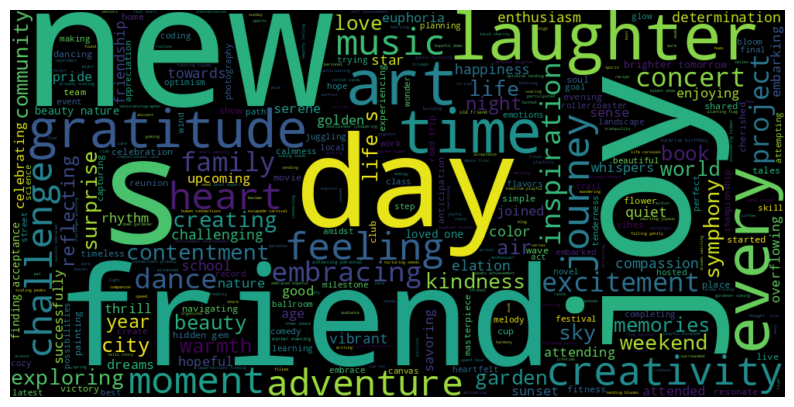

In [136]:
#word cloud for positive review words
positive_text = " ".join(data_positive['Clean_Text'])

# Generate the word cloud
plt.figure(figsize=(10,10))
wordcloud=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=wordcloud.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.axis('off')
plt.show()

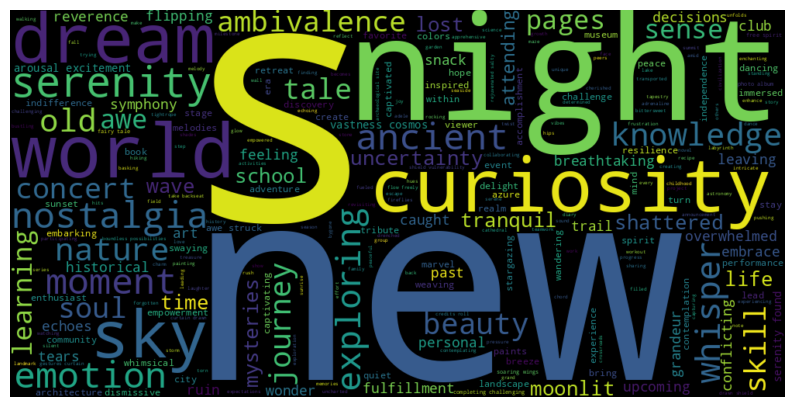

In [132]:
#word cloud for neutral review words
neutral_text = " ".join(data_neutral['Clean_Text'])

# Generate the word cloud
plt.figure(figsize=(10,10))
wordcloud=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
neutral_words=wordcloud.generate(neutral_text)
plt.imshow(neutral_words,interpolation='bilinear')
plt.axis('off')
plt.show()

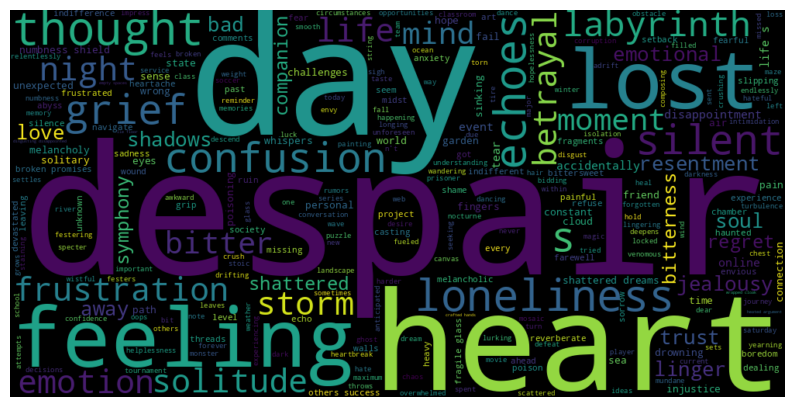

In [133]:
#word cloud for negative review words
negative_text = " ".join(data_negative['Clean_Text'])

# Generate the word cloud
plt.figure(figsize=(10,10))
wordcloud=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=wordcloud.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.axis('off')
plt.show()